# linear regression


In [11]:
import numpy as np
import matplotlib.pyplot as plt


x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]
def forward(x):
    return x*w
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)*(y_pred-y)
w_list=[]
mse_list=[]
for w in np.arange(0.0,4.1,0.1):
    print('w=',w)
    l_sum=0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val=forward(x_val)
        loss_val=loss(x_val,y_val)
        l_sum+=loss_val
        print('\t',x_val,y_val,y_pred_val,loss_val)
    print('MSE=',l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)



w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

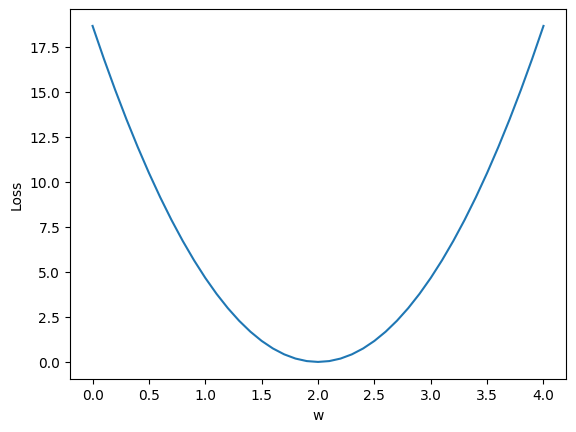

In [12]:

plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()


# gradient descent

In [13]:

x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

w=1.0
w_list=[]
epoch_list=[]
cost_list=[]

def forward(x):
    return x*w

def cost(xs,ys):
    cost=0
    for x,y in zip(x_data,y_data):
        y_pred=forward(x)
        cost+=(y_pred-y) **2
    return cost/len(xs)

def gradient(xs,ys):
    grad=0
    for x,y in zip(xs,ys):
        grad+=2*x*(x*w-y)
    return grad/len(xs)

print('predict y before training ',4,forward(4))
for epoch in range (100):
    cost_val=cost(x_data,y_data)
    grad_val=gradient(x_data,y_data)
    w-=0.01*grad_val
    w_list.append(w)
    epoch_list.append(epoch)
    cost_list.append(cost_val)
    print('epoch:',epoch,'w=',w,'loss=',cost_val)
print('predict y after training',4,forward(4))




predict y before training  4 4.0
epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
epoch: 17 w=

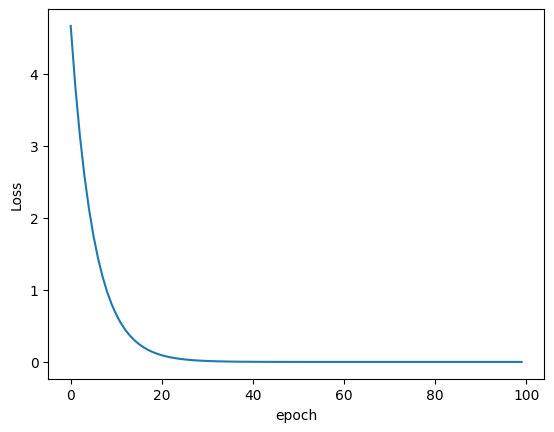

In [14]:


plt.plot(epoch_list,cost_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()



### stochastic gradient descent
不能并行处理数据

In [15]:
x_data=[1.0,2.0,3.0,4.0]
y_data=[2.0,4.0,6.0,8.0]

w=1.0
epoch_list=[]
loss_list=[]
w_list=[]
def forward(x):
    return x*w

def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2

def gradient(x,y):
    return 2*x*(x*w-y)

print('pridict before training :',4,forward(4))

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        grad=gradient(x,y)
        w=w-0.01*grad
        print('\tgrad:',x,y,grad)
        l=loss(x,y)
    w_list.append(w)
    epoch_list.append(epoch)
    print('progress:',epoch,'w=',w,'loss=',l)
print('predict after training ',4,forward(4))





pridict before training : 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
	grad: 4.0 8.0 -23.657984
progress: 0 w= 1.4972678400000001 loss= 4.043833995172248
	grad: 1.0 2.0 -1.0054643199999997
	grad: 2.0 4.0 -3.9414201343999995
	grad: 3.0 6.0 -8.158739678208
	grad: 4.0 8.0 -11.89362939756544
progress: 1 w= 1.7472603753017344 loss= 1.0220370862819224
	grad: 1.0 2.0 -0.5054792493965312
	grad: 2.0 4.0 -1.981478657634403
	grad: 3.0 6.0 -4.101660821303216
	grad: 4.0 8.0 -5.979309997277575
progress: 2 w= 1.8729396625578516 loss= 0.2583092696146019
	grad: 1.0 2.0 -0.2541206748842968
	grad: 2.0 4.0 -0.9961530455464427
	grad: 3.0 6.0 -2.062036804281137
	grad: 4.0 8.0 -3.0059914302409467
progress: 3 w= 1.9361226821073798 loss= 0.06528498785847768
	grad: 1.0 2.0 -0.12775463578524038
	grad: 2.0 4.0 -0.5007981722781416
	grad: 3.0 6.0 -1.036652216615753
	grad: 4.0 8.0 -1.5112085646665179
progress: 4 w= 1.9678868180008364 loss= 0.016500103329782457
	grad: 1.0 2.0 -0.06422636399

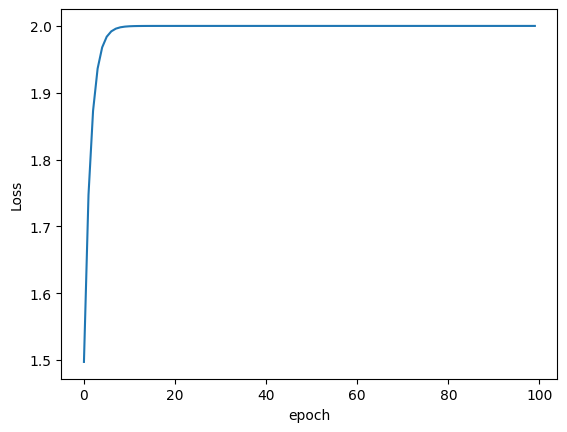

In [16]:
plt.plot(epoch_list,w_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()


# back propagation

In [17]:
import torch 

x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

w=torch.Tensor([1.0])
w.requires_grad=True


因为w是tensor，所以w*x后，x自动转换为tensor

In [18]:
def forward(x):
    return w*x

def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2
    

w是一个tensor，其中有data和grad，grad也是一个tensor，取grad的值也需要.data
每次计算后需要清空grad的数据，避免防止影响下次计算

In [19]:
print('predict before training',4,forward(4).item())

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l=loss(x,y)
        l.backward()
        print('\tgrad:',x,y,w.grad.item())
        w.data=w.data-0.01*w.grad.data
        
        w.grad.data.zero_()
    print('progress',epoch,l.item())
print('pridict after training:',4,forward(4).item())


predict before training 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.0 4.0 -0.

# pytorch linear regression

optimizer:SGD

In [20]:
import torch

x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
model =LinearModel()

criterion=torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data)


0 11.109041213989258
1 5.0324201583862305
2 2.326028347015381
3 1.1199887990951538
4 0.5818797945976257
5 0.34113192558288574
6 0.23277795314788818
7 0.18337902426719666
8 0.1602417230606079
9 0.14881190657615662
10 0.14261040091514587
11 0.1387520432472229
12 0.1359526664018631
13 0.1336403787136078
14 0.13156023621559143
15 0.129598468542099
16 0.12770415842533112
17 0.12585508823394775
18 0.12403977662324905
19 0.12225455045700073
20 0.12049642205238342
21 0.1187639832496643
22 0.11705679446458817
23 0.11537456512451172
24 0.11371621489524841
25 0.11208187788724899
26 0.11047132313251495
27 0.10888369381427765
28 0.1073187068104744
29 0.10577640682458878
30 0.10425610840320587
31 0.10275788605213165
32 0.10128118097782135
33 0.09982562810182571
34 0.09839097410440445
35 0.09697678685188293
36 0.09558318555355072
37 0.09420955181121826
38 0.09285563230514526
39 0.09152109920978546
40 0.09020570665597916
41 0.0889093428850174
42 0.08763162791728973
43 0.08637217432260513
44 0.08513089

c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


optimizer:Adam

In [21]:
import torch

x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
model =LinearModel()

criterion=torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data.item())


0 138.82125854492188
1 137.56051635742188
2 136.30572509765625
3 135.05699157714844
4 133.81442260742188
5 132.57809448242188
6 131.34811401367188
7 130.12457275390625
8 128.90756225585938
9 127.69713592529297
10 126.493408203125
11 125.29647827148438
12 124.10638427734375
13 122.92321014404297
14 121.74701690673828
15 120.5779037475586
16 119.41590881347656
17 118.26110076904297
18 117.113525390625
19 115.97323608398438
20 114.84028625488281
21 113.71472930908203
22 112.59657287597656
23 111.48588562011719
24 110.3826904296875
25 109.28703308105469
26 108.19891357421875
27 107.11834716796875
28 106.04537963867188
29 104.98001098632812
30 103.92228698730469
31 102.87217712402344
32 101.8297119140625
33 100.79489135742188
34 99.76771545410156
35 98.74819946289062
36 97.7363052368164
37 96.73206329345703
38 95.73544311523438
39 94.74645233154297
40 93.76506805419922
41 92.79127502441406
42 91.82508850097656
43 90.86644744873047
44 89.91535949707031
45 88.97180938720703
46 88.035758972167

# logistic regression

In [22]:
import torch.nn.functional as F
import torch
x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[0.0],[0.0],[1.0]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)
    def forward(self,x):
            y_pred=F.sigmoid(self.linear(x))
            return y_pred
model=LogisticRegressionModel()

criterion=torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data.item())


0 2.48234486579895
1 2.4385483264923096
2 2.3965659141540527
3 2.356384754180908
4 2.317985773086548
5 2.2813453674316406
6 2.246433734893799
7 2.2132182121276855
8 2.181659698486328
9 2.151716709136963
10 2.1233434677124023
11 2.0964908599853516
12 2.071107864379883
13 2.047140598297119
14 2.024534225463867
15 2.003232002258301
16 1.9831769466400146
17 1.9643118381500244
18 1.9465785026550293
19 1.9299205541610718
20 1.9142813682556152
21 1.8996062278747559
22 1.8858410120010376
23 1.8729329109191895
24 1.860831618309021
25 1.8494882583618164
26 1.8388553857803345
27 1.8288882970809937
28 1.8195439577102661
29 1.8107811212539673
30 1.8025615215301514
31 1.7948479652404785
32 1.787605881690979
33 1.7808022499084473
34 1.7744064331054688
35 1.7683894634246826
36 1.7627239227294922
37 1.7573847770690918
38 1.7523481845855713
39 1.7475913763046265
40 1.7430943250656128
41 1.7388375997543335
42 1.7348031997680664
43 1.7309741973876953
44 1.7273354530334473
45 1.723872423171997
46 1.7205717

c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


680 1.123673439025879
681 1.1231080293655396
682 1.122543454170227
683 1.1219794750213623
684 1.1214162111282349
685 1.1208535432815552
686 1.1202917098999023
687 1.1197305917739868
688 1.11916983127594
689 1.11860990524292
690 1.1180506944656372
691 1.1174920797348022
692 1.1169341802597046
693 1.1163768768310547
694 1.1158204078674316
695 1.115264654159546
696 1.1147091388702393
697 1.1141546964645386
698 1.113600730895996
699 1.1130475997924805
700 1.1124950647354126
701 1.1119431257247925
702 1.1113920211791992
703 1.1108412742614746
704 1.1102912425994873
705 1.1097420454025269
706 1.1091935634613037
707 1.1086454391479492
708 1.1080982685089111
709 1.1075513362884521
710 1.1070053577423096
711 1.1064600944519043
712 1.1059153079986572
713 1.1053712368011475
714 1.104827880859375
715 1.1042850017547607
716 1.103743076324463
717 1.1032013893127441
718 1.1026604175567627
719 1.1021201610565186
720 1.1015807390213013
721 1.1010417938232422
722 1.1005034446716309
723 1.099965810775756

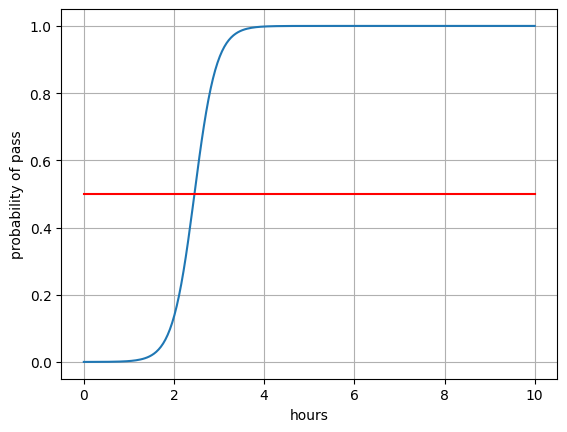

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,10,200)
x_t=torch.Tensor(x).view((200,1))
y_t=model(x_t)
y=y_t.data.numpy()
plt.plot(x,y)
plt.plot([0,10],[0.5,0.5],c='r')
plt.xlabel('hours')
plt.ylabel('probability of pass')
plt.grid()
plt.show()

# multiple dimension input

In [24]:
import numpy as np
xy=np.loadtxt(r'C:\Users\fetishism\.conda\envs\test3_10\Lib\site-packages\numpy\lib\diabetes_data.csv.gz',delimiter=' ',dtype=np.float32)
x_data=torch.from_numpy(xy[:,:-1])
y_data=torch.from_numpy(xy[:,[-1]])
y_data=y_data*0.01
for y in y_data:
    if y>1.0:
        print(y)
        y=torch.tensor([1.0])
#上行代码失效
print (x_data,y_data)

tensor([1.2400])
tensor([1.0100])
tensor([1.0400])
tensor([1.1400])
tensor([1.0900])
tensor([1.0300])
tensor([1.0100])
tensor([1.0600])
tensor([1.0900])
tensor([1.0800])
tensor([1.1000])
tensor([1.0100])
tensor([1.1700])
tensor([1.1300])
tensor([1.2400])
tensor([1.0500])
tensor([1.0300])
tensor([1.0900])
tensor([1.2000])
tensor([1.0900])
tensor([1.0500])
tensor([1.0900])
tensor([1.2300])
tensor([1.0100])
tensor([1.0900])
tensor([1.0300])
tensor([1.1200])
tensor([1.0600])
tensor([1.1700])
tensor([1.2200])
tensor([1.1200])
tensor([1.0500])
tensor([1.0200])
tensor([1.1000])
tensor([1.2000])
tensor([1.1700])
tensor([1.0300])
tensor([1.0200])
tensor([1.0800])
tensor([1.0500])
tensor([1.0300])
tensor([1.0300])
tensor([1.0500])
tensor([1.0100])
tensor([1.0100])
tensor([1.0800])
tensor([1.1300])
tensor([1.0500])
tensor([1.0100])
tensor([1.0900])
tensor([1.0800])
tensor([1.0200])
tensor([1.0200])
tensor([1.1100])
tensor([1.1100])
tensor([1.0100])
tensor([1.0800])
tensor([1.0600])
tensor([1.0600

In [25]:
import torch 

class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1=torch.nn.Linear(9,6)
        self.linear2=torch.nn.Linear(6,4)
        self.linear3=torch.nn.Linear(4,1)
        self.sigmoid=torch.nn.Sigmoid()
    
    def forward(self,x):
        x=self.sigmoid(self.linear1(x))
        x=self.sigmoid(self.linear2(x))
        x=self.sigmoid(self.linear3(x))
        return x

model=Model()

criterion=torch.nn.BCELoss(size_average=True)
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(100):
    
    y_pred=model(x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

0 0.9554095268249512
1 0.9499569535255432
2 0.9445514678955078
3 0.9391928315162659
4 0.9338804483413696
5 0.92861407995224
6 0.9233935475349426
7 0.9182182550430298
8 0.9130882620811462
9 0.9080028533935547
10 0.9029618501663208
11 0.8979649543762207
12 0.8930119872093201
13 0.8881020545959473
14 0.883235514163971
15 0.8784117102622986
16 0.8736303448677063
17 0.8688911199569702
18 0.8641935586929321
19 0.8595375418663025
20 0.8549228310585022
21 0.8503488898277283
22 0.8458154201507568
23 0.841322124004364
24 0.8368687033653259
25 0.8324548602104187
26 0.8280802369117737
27 0.823744535446167
28 0.81944739818573
29 0.8151885867118835
30 0.8109679222106934
31 0.8067845702171326
32 0.802638828754425
33 0.798530101776123
34 0.7944580316543579
35 0.7904224395751953
36 0.7864230871200562
37 0.7824593782424927
38 0.7785312533378601
39 0.7746384739875793
40 0.7707803845405579
41 0.76695716381073
42 0.7631680369377136
43 0.7594130039215088
44 0.7556918263435364
45 0.7520040273666382
46 0.7483

c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


# dataset and dataloader

In [26]:
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader

class DiabetesDataset(Dataset):
    def __init__(self,filepath) :
        xy=np.loadtxt(filepath,delimiter=' ',dtype=np.float32)
        self.len=xy.shape[0]
        self.x_data=torch.from_numpy(xy[:,:-1])
        self.y_data=torch.from_numpy(xy[:,[-1]])
        self.y_data/=100
        self.y_data=torch.clamp(self.y_data,max=1.0)

    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]

    def __len__(self):
        return self.len

dataset=DiabetesDataset(r'C:\Users\fetishism\.conda\envs\test3_10\Lib\site-packages\numpy\lib\diabetes_data.csv.gz')
train_loader=DataLoader(dataset=dataset,batch_size=32,shuffle=True,num_workers=0)

print (dataset.y_data)


tensor([[0.8700],
        [0.6900],
        [0.8500],
        [0.8900],
        [0.8000],
        [0.6800],
        [0.8200],
        [0.9200],
        [0.9400],
        [0.8800],
        [0.8300],
        [0.7700],
        [0.8100],
        [0.8800],
        [0.7300],
        [0.8100],
        [0.9800],
        [0.9100],
        [0.8700],
        [0.7800],
        [0.9500],
        [0.8700],
        [0.8800],
        [1.0000],
        [0.7800],
        [0.8300],
        [0.9000],
        [1.0000],
        [0.7800],
        [1.0000],
        [0.8900],
        [0.8100],
        [0.9800],
        [0.9200],
        [0.7500],
        [0.9600],
        [0.8500],
        [0.9000],
        [0.9700],
        [0.9200],
        [1.0000],
        [0.8900],
        [0.8300],
        [1.0000],
        [0.8700],
        [0.7900],
        [0.7000],
        [0.7100],
        [0.8600],
        [0.8800],
        [0.9300],
        [0.8600],
        [0.8800],
        [1.0000],
        [0.9300],
        [0

In [27]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1=torch.nn.Linear(9,6)
        self.linear2=torch.nn.Linear(6,3)
        self.linear3=torch.nn.Linear(3,1)
        self.sigmoid=torch.nn.Sigmoid()

    def forward(self,x):
        x=self.sigmoid(self.linear1(x))
        x=self.sigmoid(self.linear2(x))
        x=self.sigmoid(self.linear3(x))
        return x
    
model=Model()

criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
for epoch in range(10):
        for i,data in enumerate(train_loader,0):
            inputs,labels=data
            y_pred=model(inputs)
            loss=criterion(y_pred,labels)
            print(epoch,i,loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    




0 0 1.083205223083496
0 1 1.072532296180725
0 2 1.0489959716796875
0 3 1.0348995923995972
0 4 1.0343828201293945
0 5 1.0544826984405518
0 6 1.0294570922851562
0 7 1.0250301361083984
0 8 0.9952404499053955
0 9 1.0109264850616455
0 10 0.99199378490448
0 11 1.0158828496932983
0 12 0.9945865869522095
0 13 1.0129265785217285
1 0 0.9780747890472412
1 1 0.9833017587661743
1 2 0.9826390743255615
1 3 0.9763581156730652
1 4 0.9519969820976257
1 5 0.9510758519172668
1 6 0.957269012928009
1 7 0.9449822902679443
1 8 0.9293258786201477
1 9 0.9415464997291565
1 10 0.9304344654083252
1 11 0.9142953157424927
1 12 0.9249457716941833
1 13 0.904895544052124
2 0 0.9035952091217041
2 1 0.91804039478302
2 2 0.9057696461677551
2 3 0.903518557548523
2 4 0.885595977306366
2 5 0.8867528438568115
2 6 0.8778026700019836
2 7 0.872531533241272
2 8 0.8690838813781738
2 9 0.8724271655082703
2 10 0.8591235876083374
2 11 0.8586286902427673
2 12 0.8367619514465332
2 13 0.8511155247688293
3 0 0.8336237072944641
3 1 0.8498

3 13 0.7916393280029297
4 0 0.7960597276687622
4 1 0.7849215865135193
4 2 0.7746824622154236
4 3 0.7683183550834656
4 4 0.7716174125671387
4 5 0.7742158770561218
4 6 0.7643038034439087
4 7 0.7578251361846924
4 8 0.7620030045509338
4 9 0.7553772330284119
4 10 0.7540023326873779
4 11 0.7465229630470276
4 12 0.744438648223877
4 13 0.7411494851112366
5 0 0.7374428510665894
5 1 0.7331036925315857
5 2 0.7323105335235596
5 3 0.7274961471557617
5 4 0.7228179574012756
5 5 0.7204779982566833
5 6 0.7192556858062744
5 7 0.716972291469574
5 8 0.7120596766471863
5 9 0.7079817056655884
5 10 0.7053590416908264
5 11 0.702350378036499
5 12 0.6993805170059204
5 13 0.6959011554718018
6 0 0.6933161020278931
6 1 0.6908657550811768
6 2 0.6877761483192444
6 3 0.6842751502990723
6 4 0.6813926696777344
6 5 0.678921103477478
6 6 0.675361156463623
6 7 0.6732307076454163
6 8 0.6709568500518799
6 9 0.6673173904418945
6 10 0.665471076965332
6 11 0.6622755527496338
6 12 0.6594160199165344
6 13 0.6568647623062134
7 0 

# Multi-classification problem


In [28]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)



In [29]:
class Net(torch.nn.Module):
    def __init__(self) :
        super(Net,self).__init__()
        self.l1=torch.nn.Linear(784,512)
        self.l2=torch.nn.Linear(512,256)
        self.l3=torch.nn.Linear(256,128)
        self.l4=torch.nn.Linear(128,64)
        self.l5=torch.nn.Linear(64,10)
    
    def forward(self,x):
        x=x.view(-1,784)
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=F.relu(self.l3(x))
        x=F.relu(self.l4(x))
        return self.l5(x)
    
model =Net()

In [30]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)


In [31]:
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        optimizer.zero_grad()

        outputs=model(inputs)
        loss=criterion(outputs,target)
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_lossing=0.0
            

In [32]:
def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            #print(predicted[1])
            #print(labels)
    print('accuracy on test set:%f%%'%(100*correct/total))
    

In [33]:
for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:2.205
[1,  600]  loss:3.022
[1,  900]  loss:3.441
accuracy on test set:89.940000%
[2,  300]  loss:0.321
[2,  600]  loss:0.589
[2,  900]  loss:0.811
accuracy on test set:94.410000%
[3,  300]  loss:0.186
[3,  600]  loss:0.354
[3,  900]  loss:0.505
accuracy on test set:95.670000%
[4,  300]  loss:0.129
[4,  600]  loss:0.253
[4,  900]  loss:0.370
accuracy on test set:96.220000%
[5,  300]  loss:0.098
[5,  600]  loss:0.195
[5,  900]  loss:0.290
accuracy on test set:96.280000%
[6,  300]  loss:0.080
[6,  600]  loss:0.156
[6,  900]  loss:0.229
accuracy on test set:97.200000%
[7,  300]  loss:0.063
[7,  600]  loss:0.127
[7,  900]  loss:0.190
accuracy on test set:97.240000%
[8,  300]  loss:0.051
[8,  600]  loss:0.103
[8,  900]  loss:0.152
accuracy on test set:97.270000%
[9,  300]  loss:0.039
[9,  600]  loss:0.085
[9,  900]  loss:0.125
accuracy on test set:97.520000%
[10,  300]  loss:0.034
[10,  600]  loss:0.068
[10,  900]  loss:0.102
accuracy on test set:97.620000%


# CNN

In [34]:
import torch 
in_channels,out_channels=5,10
width,height=100,100
batch_size=1

input =torch.randn(batch_size,in_channels,width,height)
conv_layer=torch.nn.Conv2d(in_channels,out_channels,kernel_size=3)

output=conv_layer(input)

print(input.shape)
print(output.shape)
print(conv_layer.weight.shape)

torch.Size([1, 5, 100, 100])
torch.Size([1, 10, 98, 98])
torch.Size([10, 5, 3, 3])


In [35]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)


In [36]:
class Net(torch.nn.Module):
    def __init__(self) :
        super(Net,self).__init__()
        self.conv1=torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2=torch.nn.Conv2d(10,20,kernel_size=5)
        self.pooling=torch.nn.MaxPool2d(2)
        self.fc=torch.nn.Linear(320,10)

    def forward(self,x):
        batch_size=x.size(0)
        x=F.relu(self.pooling(self.conv1(x)))
        x=F.relu(self.pooling(self.conv2(x)))
        x=x.view(batch_size,-1)
        x=self.fc(x)
        return x

model=Net()
device=torch.device('cuda:0')
model.to(device)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)

In [37]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)


In [38]:
def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        #inputs,target=inputs.to(device),target.to(device)

        
        inputs=inputs.cuda()
        target=target.cuda()
        optimizer.zero_grad()

        
        outputs=model(inputs)
        loss=criterion(outputs,target)

        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0
            

In [39]:
def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)

            #images=images.cuda()
            #labels=labels.cuda()
            
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            #print(predicted[1])
            #print(labels)
    print('accuracy on test set:%f%%'%(100*correct/total))
    

In [40]:
for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:0.684
[1,  600]  loss:0.206
[1,  900]  loss:0.154
accuracy on test set:96.230000%
[2,  300]  loss:0.126
[2,  600]  loss:0.105
[2,  900]  loss:0.100
accuracy on test set:97.270000%
[3,  300]  loss:0.086
[3,  600]  loss:0.083
[3,  900]  loss:0.071
accuracy on test set:97.810000%
[4,  300]  loss:0.073
[4,  600]  loss:0.070
[4,  900]  loss:0.061
accuracy on test set:98.110000%
[5,  300]  loss:0.055
[5,  600]  loss:0.058
[5,  900]  loss:0.059
accuracy on test set:98.260000%
[6,  300]  loss:0.052
[6,  600]  loss:0.053
[6,  900]  loss:0.055
accuracy on test set:98.380000%
[7,  300]  loss:0.048
[7,  600]  loss:0.047
[7,  900]  loss:0.052
accuracy on test set:98.390000%
[8,  300]  loss:0.042
[8,  600]  loss:0.046
[8,  900]  loss:0.044
accuracy on test set:98.250000%
[9,  300]  loss:0.045
[9,  600]  loss:0.041
[9,  900]  loss:0.039
accuracy on test set:98.580000%
[10,  300]  loss:0.040
[10,  600]  loss:0.038
[10,  900]  loss:0.037
accuracy on test set:98.630000%


a more complex edtion

In [41]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)


In [42]:
class InceptionA(torch.nn.Module):
    def __init__(self,in_channels):
        super(InceptionA,self).__init__()
        self.branch1x1=torch.nn.Conv2d(in_channels,16,kernel_size=1)

        self.branch5x5_1=torch.nn.Conv2d(in_channels,16,kernel_size=1)
        self.branch5x5_2=torch.nn.Conv2d(16,24,kernel_size=5,padding=2)
        
        self.branch3x3_1=torch.nn.Conv2d(in_channels,16,kernel_size=1)
        self.branch3x3_2=torch.nn.Conv2d(16,24,kernel_size=3,padding=1)
        self.branch3x3_3=torch.nn.Conv2d(24,24,kernel_size=3,padding=1)

        self.branch_pool=torch.nn.Conv2d(in_channels,24,kernel_size=1)

    def forward(self,x):
        branch1x1=self.branch1x1(x)

        branch5x5=self.branch5x5_1(x)
        branch5x5=self.branch5x5_2(branch5x5)

        branch3x3=self.branch3x3_1(x)
        branch3x3=self.branch3x3_2(branch3x3)
        branch3x3=self.branch3x3_3(branch3x3)

        branch_pool=F.avg_pool2d(x,kernel_size=3,stride=1,padding=1)
        branch_pool=self.branch_pool(branch_pool)

        outputs=[branch1x1,branch5x5,branch3x3,branch_pool]
        return torch.cat(outputs,dim=1)
    
class Net(torch.nn.Module):
    def __init__(self) :
        super(Net,self).__init__()
        self.conv1=torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2=torch.nn.Conv2d(88,20,kernel_size=5)
        self.incept1=InceptionA(in_channels=10)
        self.incept2=InceptionA(in_channels=20)
        self.mp=torch.nn.MaxPool2d(2)
        self.fc=torch.nn.Linear(1408,10)

    def forward(self,x):
        in_size=x.size(0)
        x=F.relu(self.mp(self.conv1(x)))
        x=self.incept1(x)
        x=F.relu(self.mp(self.conv2(x)))
        x=self.incept2(x)
        x=x.view(in_size,-1)
        x=self.fc(x)
        return x

model=Net()
device=torch.device('cuda:0')
model.to(device)

criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)


def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        #inputs,target=inputs.to(device),target.to(device)

        
        inputs=inputs.cuda()
        target=target.cuda()
        optimizer.zero_grad()

        
        outputs=model(inputs)
        loss=criterion(outputs,target)

        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0

def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)

            #images=images.cuda()
            #labels=labels.cuda()
            
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            #print(predicted[1])
            #print(labels)
    print('accuracy on test set:%f%%'%(100*correct/total))

for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:0.770
[1,  600]  loss:0.189
[1,  900]  loss:0.133
accuracy on test set:96.900000%
[2,  300]  loss:0.103
[2,  600]  loss:0.093
[2,  900]  loss:0.087
accuracy on test set:98.150000%
[3,  300]  loss:0.071
[3,  600]  loss:0.074
[3,  900]  loss:0.072
accuracy on test set:98.090000%
[4,  300]  loss:0.062
[4,  600]  loss:0.061
[4,  900]  loss:0.063
accuracy on test set:98.440000%
[5,  300]  loss:0.053
[5,  600]  loss:0.058
[5,  900]  loss:0.053
accuracy on test set:98.590000%
[6,  300]  loss:0.045
[6,  600]  loss:0.049
[6,  900]  loss:0.056
accuracy on test set:98.610000%
[7,  300]  loss:0.043
[7,  600]  loss:0.048
[7,  900]  loss:0.040
accuracy on test set:98.540000%
[8,  300]  loss:0.041
[8,  600]  loss:0.043
[8,  900]  loss:0.041
accuracy on test set:98.760000%
[9,  300]  loss:0.039
[9,  600]  loss:0.039
[9,  900]  loss:0.039
accuracy on test set:98.630000%
[10,  300]  loss:0.036
[10,  600]  loss:0.035
[10,  900]  loss:0.036
accuracy on test set:98.830000%


residual edition

In [43]:
import torch 
import torch.nn as nn
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

batch_size=64
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))])
train_dataset=datasets.MNIST(root='..//dataset//mnist/',train=True,download=True,transform=transform)
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

test_dataset=datasets.MNIST(root='..//dataset//mnist',train=False,download=True,transform=transform)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)



In [44]:
class ResidualBlock(nn.Module):
    def __init__(self,channels) :
        super(ResidualBlock,self).__init__()
        self.channels=channels
        self.conv1=nn.Conv2d(channels,channels,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(channels,channels,kernel_size=3,padding=1)
    
    def forward(self,x):
        y=F.relu(self.conv1(x))
        y=self.conv2(y)
        return F.relu(x+y)
    
class ResNet(nn.Module):
    def __init__(self) -> None:
        super(ResNet,self).__init__()
        self.conv1=nn.Conv2d(1,16,kernel_size=5)
        self.mp1=nn.MaxPool2d(2)
        self.rblock1=ResidualBlock(16)
        self.conv2=nn.Conv2d(16,32,kernel_size=5)
        self.mp2=nn.MaxPool2d(2)
        self.rblock2=ResidualBlock(32)
        self.fc=nn.Linear(512,10)
    
    def forward(self,x):
        in_size=x.size(0)
        x=self.mp1(F.relu(self.conv1(x)))
        x=self.rblock1(x)
        x=self.mp2(F.relu(self.conv2(x)))
        x=self.rblock2(x)
        x=x.view(in_size,-1)
        x=self.fc(x)
        return x
    
model=ResNet()
device=torch.device('cuda:0')
model.to(device)

criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

def train(epoch):
    running_loss=0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target=data
        inputs,target=inputs.to(device),target.to(device)
        optimizer.zero_grad()
        
        outputs=model(inputs)
        loss=criterion(outputs,target)

        loss.backward()
        optimizer.step()

        running_loss+=loss.item()
        if batch_idx%300==299:
            print('[%d,%5d]  loss:%.3f'%(epoch+1,batch_idx+1,running_loss/300))
            running_loss=0.0


def test():
    correct=0
    total=0
    with torch.no_grad():
        for data in test_loader:
            images,labels=data
            images=images.to(device)
            labels=labels.to(device)
            outputs=model(images)
            predicted=torch.max(outputs.data,dim=1)
            total+=labels.size(0)
            correct+=(predicted[1]==labels).sum().item()
            
    print('accuracy on test set:%f%%'%(100*correct/total))

for epoch in range(10):
    train(epoch)
    test()

[1,  300]  loss:0.545
[1,  600]  loss:0.149
[1,  900]  loss:0.111
accuracy on test set:96.920000%
[2,  300]  loss:0.085
[2,  600]  loss:0.078
[2,  900]  loss:0.070
accuracy on test set:98.270000%
[3,  300]  loss:0.063
[3,  600]  loss:0.056
[3,  900]  loss:0.055
accuracy on test set:98.290000%
[4,  300]  loss:0.045
[4,  600]  loss:0.046
[4,  900]  loss:0.048
accuracy on test set:98.660000%
[5,  300]  loss:0.040
[5,  600]  loss:0.038
[5,  900]  loss:0.041
accuracy on test set:98.780000%
[6,  300]  loss:0.034
[6,  600]  loss:0.032
[6,  900]  loss:0.034
accuracy on test set:98.720000%
[7,  300]  loss:0.028
[7,  600]  loss:0.032
[7,  900]  loss:0.030
accuracy on test set:98.850000%
[8,  300]  loss:0.027
[8,  600]  loss:0.026
[8,  900]  loss:0.027
accuracy on test set:98.920000%
[9,  300]  loss:0.024
[9,  600]  loss:0.024
[9,  900]  loss:0.024
accuracy on test set:98.910000%
[10,  300]  loss:0.022
[10,  600]  loss:0.023
[10,  900]  loss:0.021
accuracy on test set:99.110000%


# RNN

## based on cell

In [45]:
import torch 

batch_size=1
seq_len=3
input_size=4
hidden_size=2

cell=torch.nn.RNNCell(input_size=input_size,hidden_size=hidden_size)

dataset=torch.randn(seq_len,batch_size,input_size)
hidden=torch.zeros(batch_size,hidden_size)

for idx,input in enumerate(dataset):
    print('='*20,idx,'='*20)
    print('input size:',input.shape)
    hidden=cell(input,hidden)
    print('output size:',hidden.shape)
    print(hidden)

==================== 0 ====================
input size: torch.Size([1, 4])
output size: torch.Size([1, 2])
tensor([[-0.7382, -0.2135]], grad_fn=<TanhBackward0>)
==================== 1 ====================
input size: torch.Size([1, 4])
output size: torch.Size([1, 2])
tensor([[-0.3835,  0.5523]], grad_fn=<TanhBackward0>)
==================== 2 ====================
input size: torch.Size([1, 4])
output size: torch.Size([1, 2])
tensor([[-0.1820,  0.4156]], grad_fn=<TanhBackward0>)


## based on RNN

In [46]:
import torch 

batch_size=1
seq_len=3
input_size=4
hidden_size=2
num_layers=1

cell=torch.nn.RNN(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers)

inputs=torch.randn(seq_len,batch_size,input_size)
hidden=torch.zeros(num_layers,batch_size,hidden_size)

out,hidden=cell(inputs,hidden)

print('output size:',out.shape)
print('output:',out)
print('hidden size:',hidden.shape)
print('hidden:',hidden)


output size: torch.Size([3, 1, 2])
output: tensor([[[-0.9137, -0.1993]],

        [[ 0.7806,  0.5050]],

        [[ 0.1159, -0.5528]]], grad_fn=<StackBackward0>)
hidden size: torch.Size([1, 1, 2])
hidden: tensor([[[ 0.1159, -0.5528]]], grad_fn=<StackBackward0>)


## a complete version based on RNNCell

In [47]:
import torch
input_size=4
hidden_size=4
batch_size=1

idx2char=['e','h','l','o']
x_data=[1,0,2,2,3]
y_data=[3,1,2,3,2]

one_hot_lookup=[[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]]

x_one_hot=[one_hot_lookup[x] for x in x_data]

inputs=torch.Tensor(x_one_hot).view(-1,batch_size,input_size)
labels=torch.LongTensor(y_data).view(-1,1)

class Model(torch.nn.Module):
    def __init__(self,input_size,hidden_size,batch_size,num_layers=1):
        super(Model,self).__init__()
        self.batch_size=batch_size
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.rnncell=torch.nn.RNNCell(input_size=self.input_size,hidden_size=self.hidden_size)
    
    def forward(self,input,hidden):
        hidden=self.rnncell(input,hidden)
        return hidden
    
    def init_hidden(self):
        return torch.zeros(self.batch_size,self.hidden_size)

net=Model(input_size,hidden_size,batch_size)

criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.1)

for epoch in range(15):
    loss=0
    optimizer.zero_grad()
    hidden=net.init_hidden()
    print('predict string',end=' ')
    for input,label in zip(inputs,labels):
        hidden=net(input,hidden)
        loss+=criterion(hidden,label)
        _,idx=hidden.max(dim=1)
        print(idx2char[idx.item()],end='')
    loss.backward()
    optimizer.step()
    print(',epoch [%d/15] loss=%.4f'%(epoch+1,loss.item()))

predict string eleee,epoch [1/15] loss=8.4295
predict string lllll,epoch [2/15] loss=6.9524
predict string ollll,epoch [3/15] loss=6.1577
predict string ollll,epoch [4/15] loss=5.5845
predict string ololl,epoch [5/15] loss=5.0803
predict string ololl,epoch [6/15] loss=4.7384
predict string ololl,epoch [7/15] loss=4.5109
predict string ololl,epoch [8/15] loss=4.3447
predict string ololl,epoch [9/15] loss=4.2206
predict string ollll,epoch [10/15] loss=4.1137
predict string ohlll,epoch [11/15] loss=3.9977
predict string ohlll,epoch [12/15] loss=3.8515
predict string ohlll,epoch [13/15] loss=3.6545
predict string ohlll,epoch [14/15] loss=3.3988
predict string oholl,epoch [15/15] loss=3.2079


# Division from image


## dataset

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [3]:
from torchvision import datasets
data_path='../data-unversioned/p1ch7/'
cifar10=datasets.CIFAR10(data_path,train=True,download=True)
cifar10_val=datasets.CIFAR10(data_path,train=False,download=True)


Files already downloaded and verified
Files already downloaded and verified


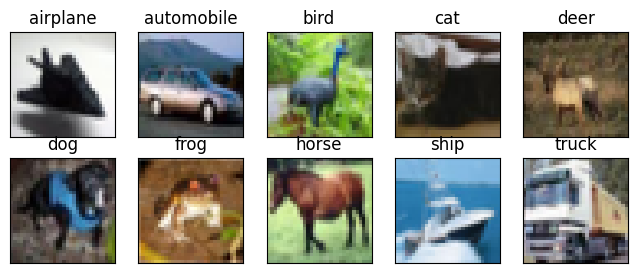

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [5]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [6]:
len(cifar10)

50000

In [7]:
img,label=cifar10[99]
img,label,class_names[label]


(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

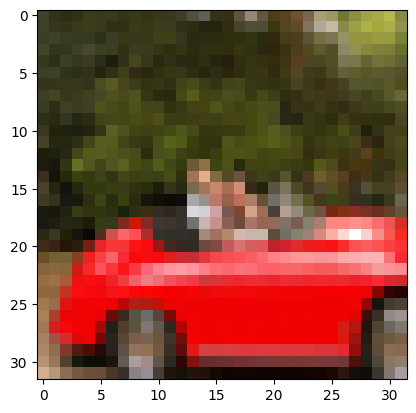

In [8]:
plt.imshow(img)
plt.show()

In [9]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_pil_constants',
 '_presets',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [10]:
to_tensor=transforms.ToTensor()
print(img.size)
img_t=to_tensor(img)
img_t.shape

(32, 32)


torch.Size([3, 32, 32])

In [11]:
tensor_cifar10=datasets.CIFAR10(data_path,train=True,download=False,transform=transforms.ToTensor())


In [12]:
img_t,_=tensor_cifar10[99]
type(img_t)

torch.Tensor

In [13]:
img_t.shape,img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [14]:
imgs=torch.stack([img_t for img_t,_ in tensor_cifar10],dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [15]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [16]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [17]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


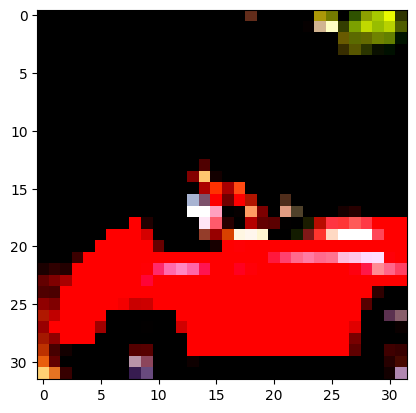

In [18]:
transformed_cifar=datasets.CIFAR10(data_path,train=True,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                                                                                                             (0.2470, 0.2435, 0.2616))]))
img_t,_=transformed_cifar[99]
plt.imshow(img_t.permute(1,2,0))
plt.show()

## divide bird and plane


In [19]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [20]:
label_map={0:0,2:1}
class_names=['airplane','bird']

cifar2=[(img,label_map[label]) for img,label in cifar10 if label in [0,2]]
cifar2_val=[(img,label_map[label]) for img,label in cifar10_val if label in [0,2]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


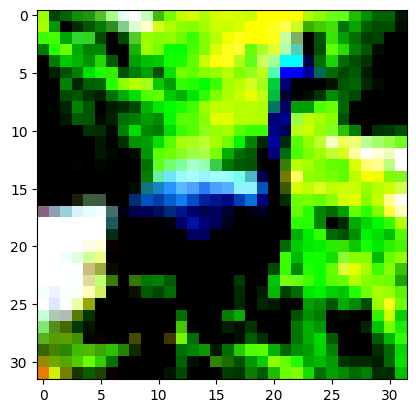

In [21]:
import torch.nn as nn
n_out =2
model=nn.Sequential(nn.Linear(3072,512),nn.Tanh(),nn.Linear(512,n_out),nn.Softmax(dim=1))
img,_=cifar2[0]
plt.imshow(img.permute(1,2,0))
plt.show()



In [22]:
img_batch=img.view(-1).unsqueeze(0)

In [23]:
out=model(img_batch)
out

tensor([[0.3700, 0.6300]], grad_fn=<SoftmaxBackward0>)

In [24]:
_,index=torch.max(out,dim=1)
index

tensor([1])

In [26]:
model=nn.Sequential(nn.Linear(3072,512),nn.Tanh(),nn.Linear(512,n_out),nn.LogSoftmax(dim=1))
loss=nn.NLLLoss()

In [27]:
img,label=cifar2[0]
out=model(img.view(-1).unsqueeze(0))
loss(out,torch.tensor([label]))


tensor(0.5077, grad_fn=<NllLossBackward0>)

## the whole 

In [37]:
import torch
import torch.nn as nn

model=nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1))
device=torch.device('cuda:0')
#model.to(device)
learning_rate=0.01

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn=nn.NLLLoss()
n_epoch=100

for epoch in range(n_epoch):
    for img,label in cifar2:
        #img=img.to(device)
        #label=label.to(device)
        out=model(img.view(-1).unsqueeze(0))
        #out=out.to(device)
        loss=loss_fn(out,torch.tensor([label]))
        loss=loss.to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print ('epoch:%d,loss:%f'%(epoch,float(loss)))
    


epoch:0,loss:7.260026
epoch:1,loss:11.465638
epoch:2,loss:10.553790
epoch:3,loss:7.506011
epoch:4,loss:8.308199
epoch:5,loss:3.928346
epoch:6,loss:7.689505
epoch:7,loss:2.305518
epoch:8,loss:8.406413
epoch:9,loss:5.066407
epoch:10,loss:1.798943
epoch:11,loss:3.825822
epoch:12,loss:12.332343
epoch:13,loss:11.359338
epoch:14,loss:5.430607
epoch:15,loss:10.051402
epoch:16,loss:14.071835
epoch:17,loss:14.376523
epoch:18,loss:6.772996
epoch:19,loss:11.793221
epoch:20,loss:4.046501
epoch:21,loss:9.866837
epoch:22,loss:7.671398
epoch:23,loss:8.069550
epoch:24,loss:10.320398
epoch:25,loss:2.072309
epoch:26,loss:15.108162
epoch:27,loss:7.321202
epoch:28,loss:8.544377
epoch:29,loss:8.304936
epoch:30,loss:12.158038
epoch:31,loss:2.590669
epoch:32,loss:1.045754
epoch:33,loss:10.548478
epoch:34,loss:12.199965
epoch:35,loss:16.941732
epoch:36,loss:6.000630
epoch:37,loss:7.458299
epoch:38,loss:10.946033
epoch:39,loss:11.149146
epoch:40,loss:6.332991
epoch:41,loss:5.125181
epoch:42,loss:11.870554
epoc

KeyboardInterrupt: 

In [40]:
import torch
import torch.nn as nn

train_loader=torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=True)
model=nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1))
device=torch.device('cuda:0')
#model.to(device)
learning_rate=0.01

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn=nn.NLLLoss()
n_epoch=100

for epoch in range(n_epoch):
    for img,label in train_loader:
        batch_size=imgs.shape[0]
        #img=img.to(device)
        #label=label.to(device)
        outputs=model(imgs.view(batch_size,-1))

        #out=out.to(device)
        loss=loss_fn(outputs,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print ('epoch:%d,loss:%f'%(epoch,float(loss)))
    


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x51200000 and 3072x512)